In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/bgrazda/eds220-hwk3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


The first dataset comes from the New York State Department of Environmental Conservation, accessed on November 4th, 2024. It includes data on spills within the state as well as waterbodies, contributing factors for the spill, and more.

The second dataset is the TIGER shapefile from the Census Bureau with data from all 50 states. The data of access is November 4th, 2024. This dataset includes the state FIPS code that each county is located in, as well as the

## 3. Import libraries

In [2]:
# Load packages
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Create file path of NY spills data for reproducibility
fp_spills = os.path.join("data", "Spill_Incidents_20241104.csv")

# Import NY spills data
spills = pd.read_csv(fp_spills)

# Create US counties data filepath for reproducibility
fp_counties = os.path.join("data", "tl_2023_us_county.shp")

# Import US counties data
counties = gpd.read_file(fp_counties)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [5]:
# b. Look at spill data types
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [6]:
# c. Look at unique values in material family column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
# d. Unique values in county column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

From the preliminary exploration, I noticed that there are a good amount of NA values just from looking at the first five rows in the dataframe. Additionally, looking at the data types showed me that every single column data type is a string object. There are many unique county values and the unique values within the material family column are Petroleum, Oxygenates, Hazardous Material, and other. This information tells me that I may have to do a good amount of data cleaning to format the dataframe correctly.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [8]:
# a. Clean names to snake case 
spills.columns = (spills.columns
                  .str.replace(" ", "_")
                  .str.lower())

# Check column names
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

In [9]:
# b. Convert "spill_date" column to a datetime object
spills["spill_date"] = pd.to_datetime(spills["spill_date"])

# Check data type
spills["spill_date"]

0        2001-10-10
1        2004-08-21
2        2004-08-21
3        2002-08-02
4        2003-01-20
            ...    
553093   2004-04-27
553094   1999-07-06
553095   1993-03-02
553096   1990-01-05
553097   2001-06-13
Name: spill_date, Length: 553098, dtype: datetime64[ns]

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# a. Create new variable that selects Petroleum spills between Jan 1st, 2023 and Oct 31st, 2023
petr_23 = spills[(spills.spill_date <= '2023-10-31') &
                 (spills.spill_date >= '2023-01-01') &
                 (spills.material_family == 'Petroleum')]

# Check df
petr_23.head()

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,diesel,Petroleum,0.0,NaN,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,#2 fuel oil,Petroleum,0.0,Gallons,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,gasoline,Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,kerosene [#1 fuel oil] (on-site consumption),Petroleum,0.0,NaN,0.0
224,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,06/06/2023,Tank Test Failure,NaN,Unknown,07/12/2023,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [11]:
# b. Find date range 
min_mth = petr_23["spill_date"].dt.month.min()
max_mth = petr_23["spill_date"].dt.month.max()
min_yr = petr_23["spill_date"].dt.year.min()
max_yr = petr_23["spill_date"].dt.year.max()

# Print the date range of `petr_23` df
print(f"The petr_23 data consists of petroleum spill observations from {min_mth}/{min_yr} to {max_mth}/{max_yr}")

The petr_23 data consists of petroleum spill observations from 1/2023 to 10/2023


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [12]:
# c. Test that all rows of `petr_23` have "Petroleum" in the "material_family" column
assert all(petr_23["material_family"] == "Petroleum"), "Non-petroleum spill detected!"
print("Only petroleum spills!")

Only petroleum spills!


<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [13]:
# Create new dataframe of spills per county with an index starting at 0
spills_per_county = pd.DataFrame(petr_23.groupby("county").count()["spill_number"]).reset_index().rename(columns = {"spill_number" : "n_spills"})
spills_per_county

,county,n_spills
0,Albany,205
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,743
62,Wyoming,24


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [14]:
# a. Look at first 5 observations
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [15]:
# b. Look at counties datatypes
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
GEOIDFQ       object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [16]:
# c. Look at the CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

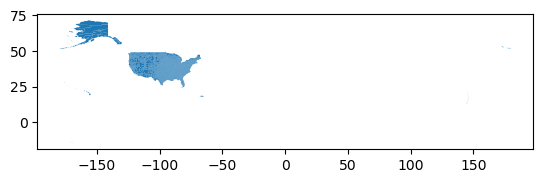

In [17]:
# d. Show preliminary counties plot
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

The preliminary info I got from this data exploration showed me that the CRS is GRS 1980, which will be important when plotting later on. I also explored the data types and found that there are only two integer objects and the rest are string objects. The exploratory plot shows me that I will need to change the CRS later on and crop it to look closer.

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [18]:
# Clean names to snake case 
counties.columns = (counties.columns
                  .str.replace(" ", "_")
                  .str.lower())

# Check column names
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

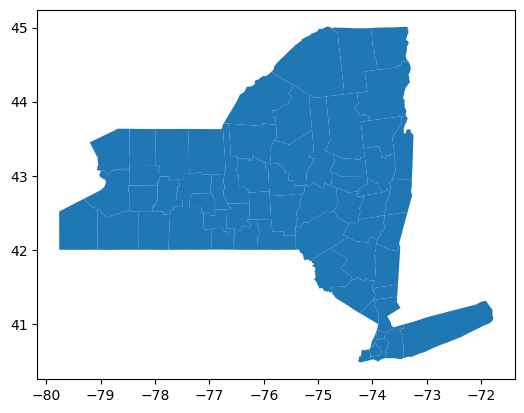

In [20]:
# Select state FIPS code of 36 for New York
ny_counties = counties[counties.statefp == '36']

# Verify
ny_counties.head()

# Plot state of NY
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [22]:
# a. Print unique names of new york counties
ny_counties['name'].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

In [23]:
# b. Print the names of the unique counties for the spills
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [29]:
# Store the county names of the spills df that are not in ny_counties df as a list
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['name']).tolist()

# Print list
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [28]:
# Store the ny_counties df that are not in spills per county df as a list
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county']).tolist()

# Print list 
diff_names_ny

['St. Lawrence']




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [30]:
# e. Locate the number of spills in Tuscarora Indian Reservation and subset into that row
spills_per_county.loc[spills_per_county['county'] == 'Tuscarora Indian Reservation', :]

,county,n_spills
56,Tuscarora Indian Reservation,1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [32]:
# Find the location of St Lawrence in the spills data frame
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', :]

# Fix name of the St. Lawrence
spills_per_county.at[50, 'county'] = 'St. Lawrence'

In [33]:
# Check that the name was updated
assert spills_per_county.at[50, 'county'] == 'St. Lawrence'

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [34]:
# Change name column in ny counties to match spills df
ny_counties = ny_counties.rename(columns={'name':'county'})

# Verify columns
ny_counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'county',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [35]:
# Inner join counties and spills dataframes
ny_counties = ny_counties.merge(spills_per_county, on='county', how='inner')


From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [36]:
# Set index to county name to use `at` to replace at Niagara
ny_counties.set_index(['county'], inplace=True)

# Update the value to include the 1 spill within Niagara county
ny_counties.at['Niagara', 'n_spills'] += 1

# Verify that it was updated
assert ny_counties.at['Niagara', 'n_spills'] == 89

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



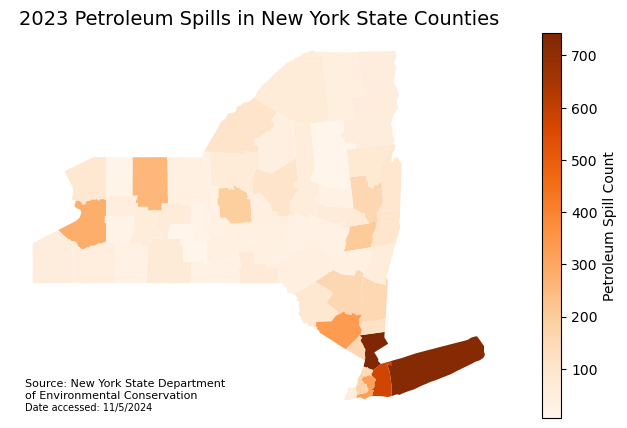

In [44]:
# Initialize figure
fig, ax = plt.subplots(figsize=(9,5))

# Remove axis for a cleaner map and set title
ax.axis('off')
ax.set_title('2023 Petroleum Spills in New York State Counties',
            fontsize=14)

# Plot NY by number of spills 
ny_counties.plot(ax=ax,
                column='n_spills',
                cmap='Oranges',
                legend=True,
                legend_kwds={
                    'label':'Petroleum Spill Count'
                })

# Annotate source and date of access
plt.annotate("Source: New York State Department\nof Environmental Conservation", 
            xy=(-79.9,40.5),
            fontsize=8)

plt.annotate("Date accessed: 11/5/2024", 
            xy=(-79.9,40.35), 
            fontsize=7)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [45]:
ny_counties.sort_values(by='n_spills', ascending=False).head(3)

,statefp,countyfp,countyns,geoid,geoidfq,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
county,,,,,,,,,,,,,,,,,,,
Westchester,36,119,00974157,36119,0500000US36119,Westchester County,06,H1,G4020,408,35620,35614,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985...",743
Suffolk,36,103,00974149,36103,0500000US36103,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",723
Nassau,36,059,00974128,36059,0500000US36059,Nassau County,06,H1,G4020,408,35620,35004,A,736960644,437290665,+40.7296118,-073.5894144,"POLYGON ((-73.78019 40.82640, -73.77498 40.830...",576


The figure depicts the number of petroleum spills per county in New York state in the year 2023. The top 3 counties with the most petroleum spills in New York state are Westchester, Suffolk, and Nassau counties, as seen on the map above.